#### Installing Libraries

In [1]:
#pip install google-search-results


#### Setting Up Parameters with api key

In [2]:
from serpapi import GoogleSearch

# Set up the parameters
params = {
  "engine": "google_jobs",
  "q": "Data Analyst Dublin",   # for loacation 
  "hl": "en",
  "api_key": "b06bc7bb36ebadcc5d3a33c1bf62d89c8e2282f9d9b1e559494717d44214036b" # private api key 
}

# Run the search
search = GoogleSearch(params)
results = search.get_dict()

# Extract job results
jobs_results = results.get("jobs_results", [])

# Optional: Print job titles
for job in jobs_results:
    print(job.get("title"), "-", job.get("company_name"))


### Fetching Data From API and converting It into DAtaFrame 

In [3]:
import requests
import pandas as pd

# Y private API key from SerpApi dashboard
api_key = 'b06bc7bb36ebadcc5d3a33c1bf62d89c8e2282f9d9b1e559494717d44214036b'  #  API key

# Using URL for the Google Jobs API from SerpAPI
url = 'https://serpapi.com/search.json?engine=google_jobs&q=dataanalyst+ireland&hl=en'
# Parameters for the API request
params = {
    'engine': 'google_jobs',
    'q': 'Data Analyst',
    'hl': 'en',
    'location': 'Ireland',
    'api_key': api_key
}
# Making  the API request 
response = requests.get(url, params=params)

# Check and display results as dataframe 
if response.status_code == 200:
    data = response.json()
    jobs = data.get('jobs_results', [])

    # Convert to DataFrame
    job_data = []
    for job in jobs:
        job_data.append({
            'Title': job.get('title'),
            'Company': job.get('company_name'),
            'Location': job.get('location'),
            'Via': job.get('via'),
            'Description': job.get('description')
        })

    df = pd.DataFrame(job_data)
    print(df.head())
else:
    print(f"Failed to fetch data: {response.status_code}")


                                               Title  \
0                                    Sr Data Analyst   
1                Senior Data Analyst, Data Analytics   
2                                  Lead Data Analyst   
3  Data Consultant (Data Scientist/Data Analyst/D...   
4  Experienced Data Analyst - Alteryx | Hybrid | ...   

                                         Company         Location  \
0                                       Fanatics  Dublin, Ireland   
1                                Cardinal Health  Dublin, Ireland   
2                                    Levy Search  Dublin, Ireland   
3  auticon Ireland - Consulting Team Talent Pool  Dublin, Ireland   
4                                Morgan McKinley          Ireland   

               Via                                        Description  
0         LinkedIn  Responsibilities\n\nJOB DESCRIPTION\n• Use tra...  
1  Cardinal Health  What Data Analytics brings to Cardinal Health\...  
2         LinkedIn  A great clie

### Checking DataFrame  

In [4]:
print(df.head())

                                               Title  \
0                                    Sr Data Analyst   
1                Senior Data Analyst, Data Analytics   
2                                  Lead Data Analyst   
3  Data Consultant (Data Scientist/Data Analyst/D...   
4  Experienced Data Analyst - Alteryx | Hybrid | ...   

                                         Company         Location  \
0                                       Fanatics  Dublin, Ireland   
1                                Cardinal Health  Dublin, Ireland   
2                                    Levy Search  Dublin, Ireland   
3  auticon Ireland - Consulting Team Talent Pool  Dublin, Ireland   
4                                Morgan McKinley          Ireland   

               Via                                        Description  
0         LinkedIn  Responsibilities\n\nJOB DESCRIPTION\n• Use tra...  
1  Cardinal Health  What Data Analytics brings to Cardinal Health\...  
2         LinkedIn  A great clie

### Checking Shape of dataframe ,information ,descripiton of dataframe 

In [5]:
print(df.shape)  # Prints the number of rows and columns
print(df.info())  # Data types and non-null values
print(df.describe())  # Basic statistics like mean, count, etc.


(10, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        10 non-null     object
 1   Company      10 non-null     object
 2   Location     10 non-null     object
 3   Via          10 non-null     object
 4   Description  10 non-null     object
dtypes: object(5)
memory usage: 532.0+ bytes
None
                  Title   Company         Location       Via  \
count                10        10               10        10   
unique               10        10                4         8   
top     Sr Data Analyst  Fanatics  Dublin, Ireland  LinkedIn   
freq                  1         1                7         3   

                                              Description  
count                                                  10  
unique                                                 10  
top     Responsibilities\n\nJOB DESCRIPTION\n• Use tr

#### Identifies  missing values in the columns

In [7]:
print(df.isnull().sum())  


Title          0
Company        0
Location       0
Via            0
Description    0
dtype: int64


  #### unique companies in the dataset

In [ ]:
print(df['Company'].unique()) 

### the unique locations

In [8]:
print(df['Location'].unique()) 


['Fanatics' 'Cardinal Health' 'Levy Search'
 'auticon Ireland - Consulting Team Talent Pool' 'Morgan McKinley'
 'Sedgwick Ireland' 'Romero Games' 'Mace' 'One Recruitment'
 'Darwin Hawkins']
['Dublin, Ireland' 'Ireland' 'Anywhere' 'Galway, Ireland']


#### Exploratory Data Analysis 

###### 1. Top 10 Companies Hiring Data Analysts in Ireland

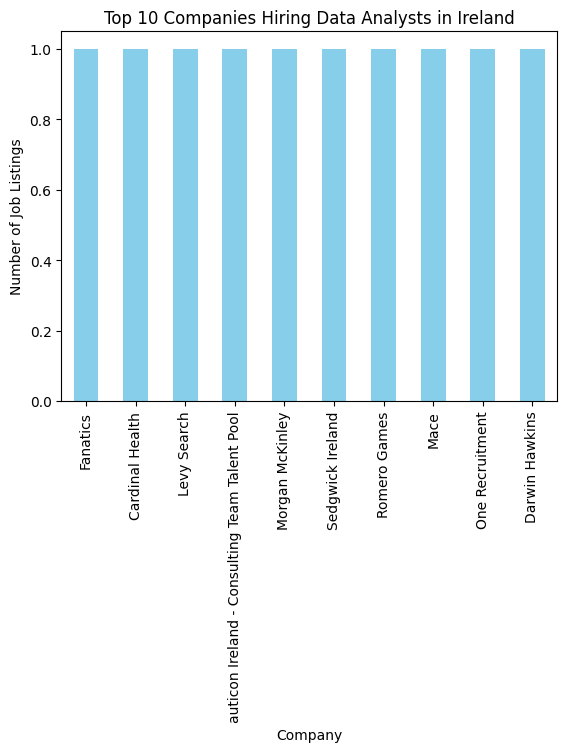

In [9]:
import matplotlib.pyplot as plt
top_companies = df['Company'].value_counts().head(10)  # the top 10 companies
top_companies.plot(kind='bar', color='skyblue', title='Top 10 Companies Hiring Data Analysts in Ireland')
plt.ylabel('Number of Job Listings')
plt.show()

##### 2. Top 10 Locations for Data Analyst Jobs

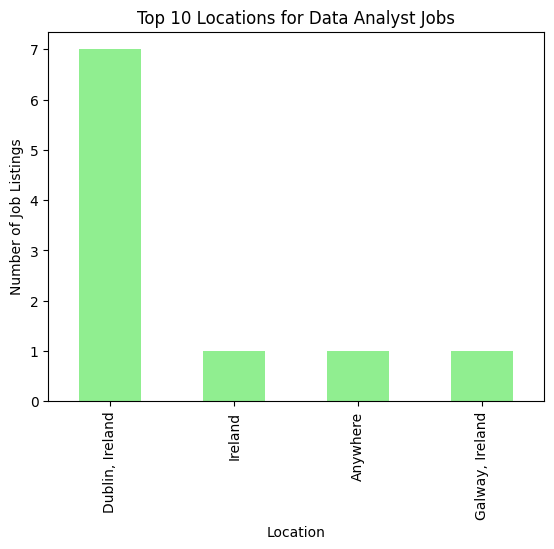

In [10]:
top_locations = df['Location'].value_counts().head(10)  # Get the top 10 locations
top_locations.plot(kind='bar', color='lightgreen', title='Top 10 Locations for Data Analyst Jobs')
plt.ylabel('Number of Job Listings')
plt.show()

##### Wordcloud

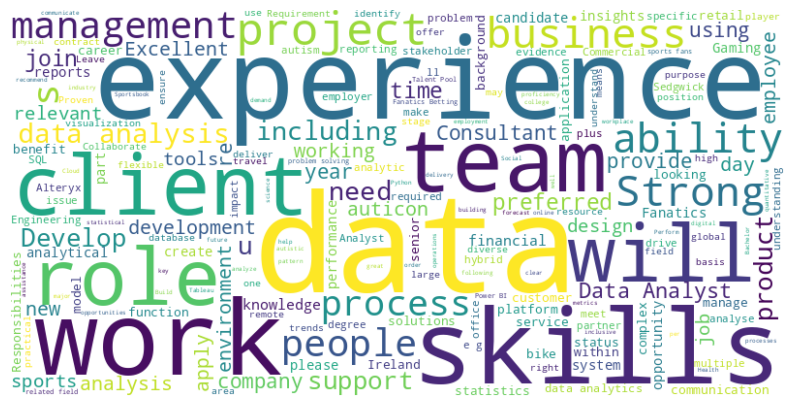

In [11]:
from wordcloud import WordCloud
text = ' '.join(df['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Get top 10 most common job titles

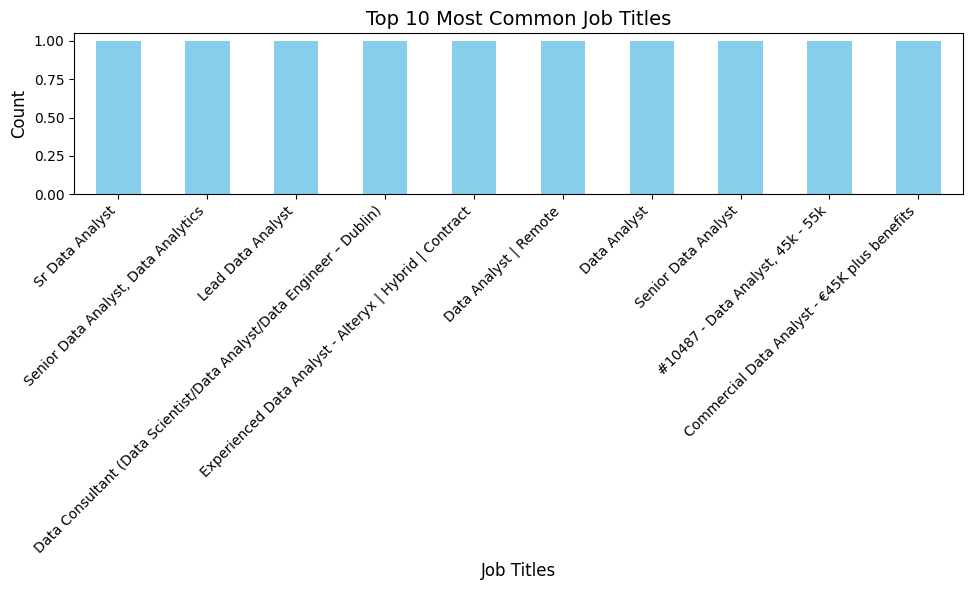

In [14]:
import matplotlib.pyplot as plt
title_counts = df['Title'].value_counts().head(10)  # Get top 10 job
#  bar chart
plt.figure(figsize=(10,6))
title_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Job Titles', fontsize=14)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  
# Show 
plt.tight_layout()
plt.show()

###### Distribution of Job Description Lengths

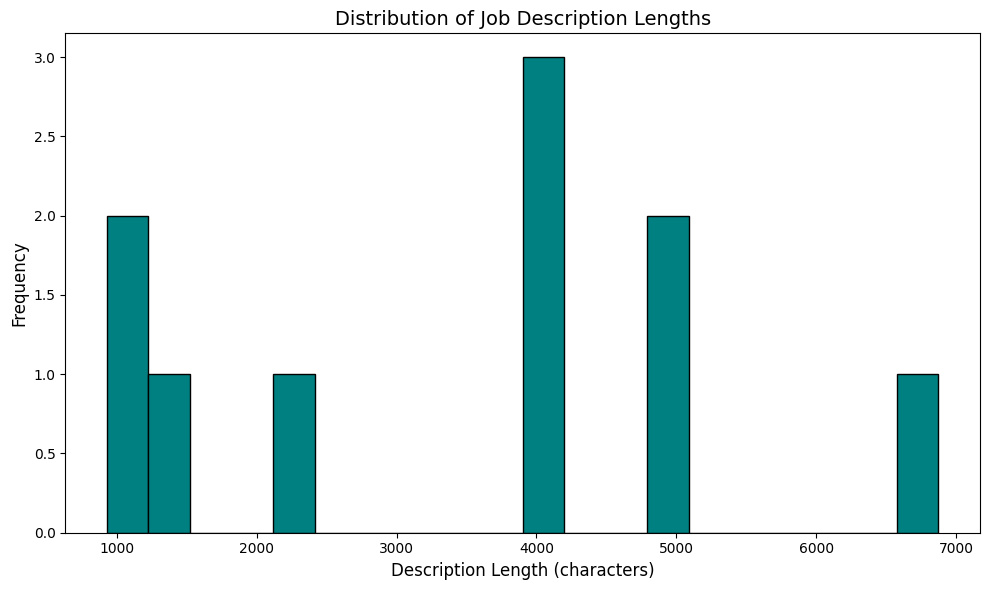

In [17]:
#length of each job description
df['Description_Length'] = df['Description'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10,6))
plt.hist(df['Description_Length'], bins=20, color='teal', edgecolor='black')
plt.title('Distribution of Job Description Lengths', fontsize=14)
plt.xlabel('Description Length (characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

###### ob listings by 'via' (posting platform)

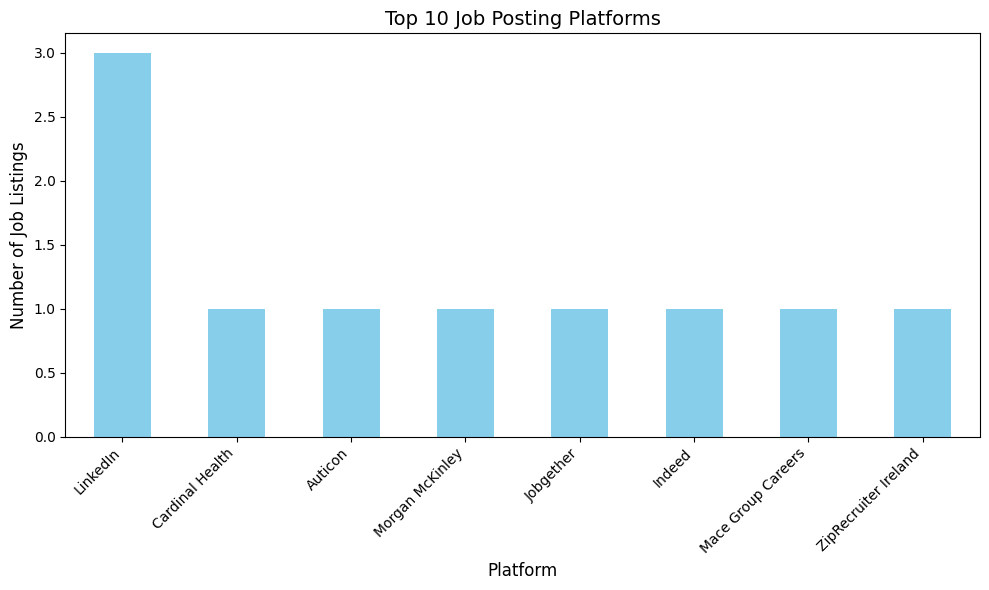

In [18]:
platform_counts = df['Via'].value_counts().head(10)  # Top 10 platforms
plt.figure(figsize=(10,6))
platform_counts.plot(kind='bar', color='skyblue')
# Title and labels
plt.title('Top 10 Job Posting Platforms', fontsize=14)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Number of Job Listings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Show 
plt.show()

#### Saveing the DataFrame to a CSV file

In [12]:
df.to_csv('data_analyst_jobs_ireland.csv', index=False)  
